In [2]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk import tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import wordcloud
from scipy import spatial
import gensim
from gensim import corpora
from sklearn.neighbors import BallTree


/home/mitos/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
import os
import math
fac_keys = list(facilities.keys())
cols = ['Guest_country', 'Room_info', 'Nights_stayed', 'Date of stay', 'Travel_type', 'Review', 'Grade', 'Title', 'Positive']
cols.extend(fac_keys)
print(cols)
all_hotels = pd.DataFrame(columns=cols)
arr = os.listdir('./hotels-with-row-facilities/')
for i in arr:
    if i.endswith('csv'):
        df = pd.read_csv('hotels-with-row-facilities/' + i)
#         print(len(df))
#         l = list(df.columns)
        all_hotels = all_hotels.append(df, ignore_index=True)
    all_hotels.info()
all_hotels.to_csv('all_hotels_row.csv', index=False)


['Guest_country', 'Room_info', 'Nights_stayed', 'Date of stay', 'Travel_type', 'Review', 'Grade', 'Title', 'Positive', 'staff', 'location', 'food/drink', 'dirty', 'bed', 'comfort', 'price', 'bathroom', 'parking', 'restaurant', 'noisiness', 'tv', 'internet', 'fitness', 'covid', 'temperature']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  2113 non-null   object 
 1   Room_info      2113 non-null   object 
 2   Nights_stayed  2113 non-null   object 
 3   Date of stay   2113 non-null   object 
 4   Travel_type    2113 non-null   object 
 5   Review         2113 non-null   object 
 6   Grade          2113 non-null   float64
 7   Title          2113 non-null   object 
 8   Positive       2113 non-null   object 
 9   staff          2113 non-null   object 
 10  location       2113 non-null   object 
 11  food/drink     2113 non

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23163 entries, 0 to 23162
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  23163 non-null  object 
 1   Room_info      23163 non-null  object 
 2   Nights_stayed  23163 non-null  object 
 3   Date of stay   23163 non-null  object 
 4   Travel_type    23163 non-null  object 
 5   Review         23163 non-null  object 
 6   Grade          23163 non-null  float64
 7   Title          23163 non-null  object 
 8   Positive       23163 non-null  object 
 9   staff          23163 non-null  object 
 10  location       23163 non-null  object 
 11  food/drink     23163 non-null  object 
 12  dirty          23163 non-null  object 
 13  bed            23163 non-null  object 
 14  comfort        23163 non-null  object 
 15  price          23163 non-null  object 
 16  bathroom       23163 non-null  object 
 17  parking        23163 non-null  object 
 18  restau

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45367 entries, 0 to 45366
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  45367 non-null  object 
 1   Room_info      45367 non-null  object 
 2   Nights_stayed  45367 non-null  object 
 3   Date of stay   45367 non-null  object 
 4   Travel_type    45367 non-null  object 
 5   Review         45367 non-null  object 
 6   Grade          45367 non-null  float64
 7   Title          45367 non-null  object 
 8   Positive       45367 non-null  object 
 9   staff          45367 non-null  object 
 10  location       45367 non-null  object 
 11  food/drink     45367 non-null  object 
 12  dirty          45367 non-null  object 
 13  bed            45367 non-null  object 
 14  comfort        45367 non-null  object 
 15  price          45367 non-null  object 
 16  bathroom       45367 non-null  object 
 17  parking        45367 non-null  object 
 18  restau

In [4]:
facilities = dict()

facilities['staff'] = ['staff', 'service', 'polite', 'rude', 'helpful', 'friendly', 'employee', 'reception']
facilities['location'] = ['view', 'location', 'place', 'victoria', 'sighting', 'airport', 'area', 'central', 'centre',
                          'city', 'near']
facilities['food/drink'] = ['meal', 'breakfast', 'lunch', 'brunch', 'dinner', 'plate', 'dish', 'hungry', 'food', 'drink', 'soda', 'coffee', 'tea']
facilities['dirty'] = ['clean', 'dirty', 'filthy', 'dust', 'cleanliness']
facilities['bed'] = ['bed', 'sheet', 'pillow', 'mattress', 'sleep']
facilities['comfort'] = ['comfort', 'comfortable', 'comfy', 'decor', 'modern', '']
facilities['price'] = ['price', 'expensive', 'cheap', 'money', 'pricey', 'paid']
facilities['bathroom'] = ['towel', 'shower', 'toilet', 'bath', 'water', 'bath', 'bathroom']
facilities['parking'] = ['car', 'parking']
facilities['restaurant'] = ['restaurant', 'menu', 'bar']
facilities['noisiness'] = ['loud', 'quiet', 'noisy', 'noise', 'sound', 'quiet']
facilities['tv'] = ['television', 'tv', 'screen', 'programm']
facilities['internet'] = ['wifi', 'signal', 'download', 'network', 'internet']
facilities['fitness'] = ['gym', 'fitness', 'spa', 'workout', 'pool']
facilities['covid'] = ['covid', 'covid19', 'virus']
facilities['temperature'] = ['air', 'conditioning', 'heating', 'temperature']

# facilities['heating'] = ['air', 'service', 'polite', 'rude', 'helpfull', 'friendly']


TypeError: can only concatenate str (not "float") to str

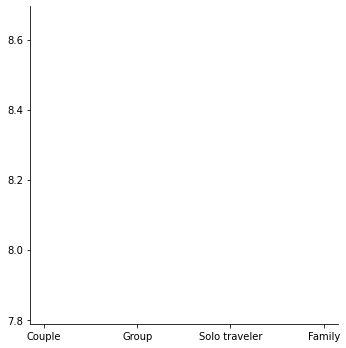

In [6]:

sns.lmplot(data=all_hotels, x="Travel_type", y="Grade", x_jitter=.5)

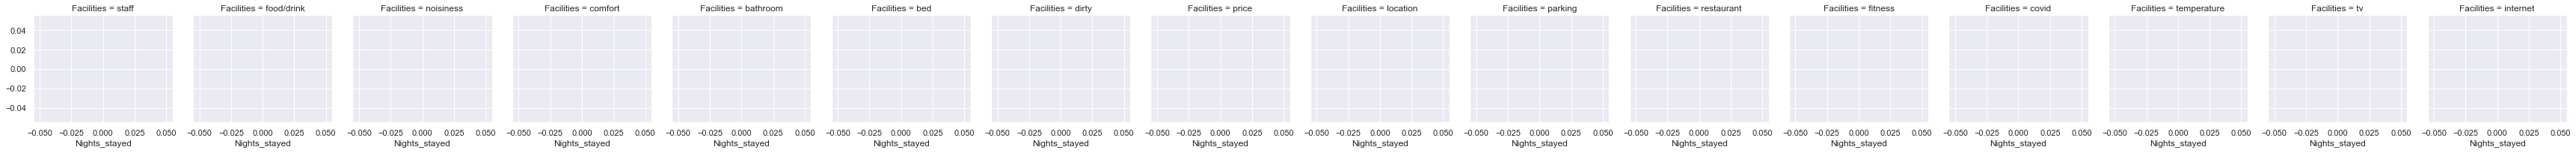

In [68]:
g = sns.FacetGrid(all_hotels, col="Facilities", hue="Positive")
g.map(sns.scatterplot, "Nights_stayed")

In [30]:
all_hotels = pd.read_csv("all_hotels_row.csv")
all_hotels.tail()

,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Positive,staff,...,price,bathroom,parking,restaurant,noisiness,tv,internet,fitness,covid,temperature
48490,United Kingdom,Superior Double Room,1,July 2018,Solo traveler,Dirty bathroom and a member of staff on recep...,4.6,Dirty Bathroom,0,1,...,0,1,0,0,0,0,0,0,0,0
48491,United Kingdom,Superior Twin Room,1,August 2018,Couple,The fact it's £2.95 for your food to come up ...,10.0,This is a place you'll not hesitate to come ba...,0,0,...,0,0,0,0,0,0,0,0,0,0
48492,United Kingdom,Superior Double Room,1,August 2018,Couple,The only small thing was an issue with our TV...,10.0,Wonderful clean and bright stay,0,0,...,0,0,0,0,1,1,0,0,0,0
48493,United Kingdom,Superior Twin Room,1,July 2018,Solo traveler,"The room furniture, bright overhead lighting....",5.8,"Wonderful staff? but grim, depressing rooms th...",0,0,...,0,0,0,0,0,0,0,0,0,0
48494,United Kingdom,Executive Double Room,1,July 2018,Family,Bedroom looks a little basic.,10.0,Exceptional,0,0,...,0,1,0,0,0,0,0,0,0,0


In [307]:
all_hotels["Date of stay"] = all_hotels['Date of stay'].str[:-5]
all_hotels

,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Positive,Facilities
0,France,Superior King Room,4,August,Family,"Everything was amazing: the staff, the room, ...",10.0,Exceptional,1,staff
1,France,Superior King Room,4,August,Family,"Everything was amazing: the staff, the room, ...",10.0,Exceptional,1,food/drink
2,United Kingdom,Superior King Room,1,March,Couple,The staff were pleasant and the room was perf...,10.0,Great location and place to stay,1,staff
3,United Kingdom,Superior King Room,1,March,Couple,The staff were pleasant and the room was perf...,10.0,Great location and place to stay,1,noisiness
4,United Kingdom,Superior King Room,1,March,Couple,The staff were pleasant and the room was perf...,10.0,Great location and place to stay,1,comfort
...,...,...,...,...,...,...,...,...,...,...
109303,Belgium,Superior Twin Room,1,August,Group,I also work at the reception in the Radisson ...,6.7,Good but not great,0,bathroom
109304,Belgium,Superior Twin Room,1,August,Group,I also work at the reception in the Radisson ...,6.7,Good but not great,0,dirty
109305,United Kingdom,Superior Double Room,1,July,Family,The room had no tea/coffee equipment I.e. Cup...,6.7,Loved the architecture and the live jazz in th...,0,food/drink
109306,United Kingdom,Superior Double Room,1,July,Family,The room had no tea/coffee equipment I.e. Cup...,6.7,Loved the architecture and the live jazz in th...,0,bathroom


In [187]:
all_hotels["Date of stay"] = pd.to_datetime(all_hotels['Date of stay'])
all_hotels = all_hotels.sort_values(by="Date of stay")
all_hotels

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-08-01 00:00:00

In [280]:
l = all_hotels['Travel_type'].factorize()
all_hotels['Travel_type'] = l[0]
# # all_hotels['Travel_type'].cat.codes
# # all_hotels.head()
l

(array([0, 0, 1, ..., 0, 0, 0]),
 Index(['Family', 'Couple', 'Solo traveler', 'Group'], dtype='object'))

In [281]:
l = all_hotels['Date of stay'].factorize()
all_hotels['Date of stay'] = l[0]
# # all_hotels['Travel_type'].cat.codes
# # all_hotels.head()
l

(array([0, 0, 1, ..., 8, 8, 8]),
 Index(['August', 'March', 'January', 'February', 'November', 'December',
        'October', 'September', 'July', 'April', 'June', 'May'],
       dtype='object'))

In [208]:
all_hotels = all_hotels.loc[(all_hotels['Facilities'] == 'fitness') | (all_hotels['Facilities'] ==  'food/drink') |( all_hotels['Facilities'] ==  'location')]
all_hotels

,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Positive,Facilities
1,France,Superior King Room,4,August,Family,"Everything was amazing: the staff, the room, ...",10.0,Exceptional,1,food/drink
13,United Kingdom,Superior King Room,3,January,Solo traveler,Luxurious room and bathroom; Modern and clea...,10.0,Exceptional,1,location
17,United Kingdom,Superior King Room,3,January,Solo traveler,Luxurious room and bathroom; Modern and clea...,10.0,Exceptional,1,food/drink
25,United Kingdom,King Studio,2,February,Solo traveler,"Really like the breakfast, the selection was ...",7.0,Pleasant,1,food/drink
28,United Kingdom,King Studio,1,January,Couple,Stayed here 1 night\nAs you walk into the hot...,8.0,Pleasant stay in a big trendy room,1,location
...,...,...,...,...,...,...,...,...,...,...
109288,United Kingdom,Executive Double Room,2,August,Couple,Executive Room to rear not clear on booking ...,5.0,Disappointing,0,food/drink
109293,United Arab Emirates,Superior Double Room,3,August,Family,"very small rooms, no view and even at the tim...",6.2,Pleasant,0,location
109298,United Kingdom,Superior Double Room,3,August,Couple,"Swimming pool not available,and the smell fro...",6.7,Pleasant,0,fitness
109301,Belgium,Superior Twin Room,1,August,Group,I also work at the reception in the Radisson ...,6.7,Good but not great,0,food/drink


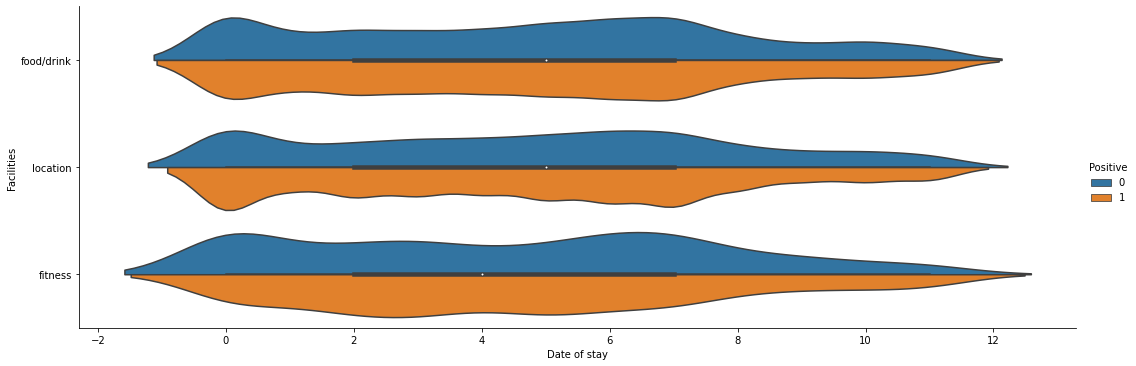

In [203]:
# sns.catplot(x="Travel_type", y="Nights_stayed",hue="food/drink", kind='violin', data=all_hotels, aspect=15/8)
sns.catplot(x = "Date of stay", y = "Facilities", kind = 'violin', hue="Positive",split="True",data = all_hotels, aspect=12/4);
plt.show()

/home/behemoth/anaconda3/envs/insurance-faq-engine-february-2021-tim2/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


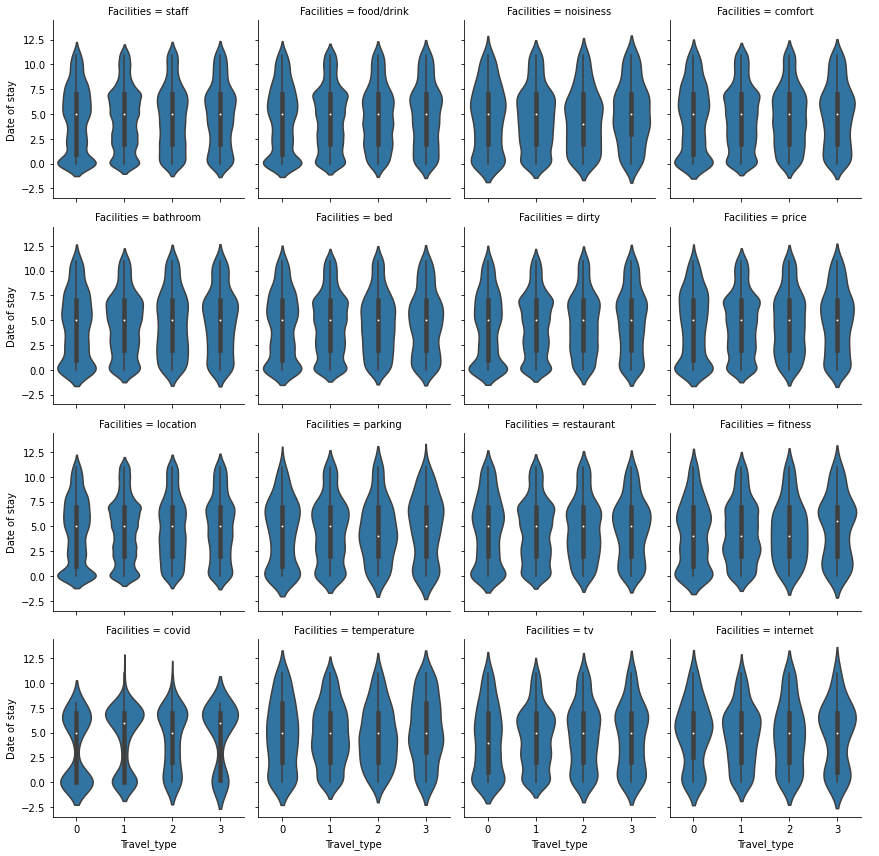

In [283]:
# families most frequent in August
g = sns.FacetGrid(all_hotels, col="Facilities", col_wrap=4)
g.map(sns.violinplot, "Travel_type","Date of stay", data=all_hotels)
g.add_legend()
# sns.catplot(x="Date of stay", col="Nights_stayed", hue="Travel_type", kind="count", palette="ch:.25", data=all_hotels, aspect=10/5)

In [ ]:
sns.catplot(x="Date of stay", hue="Facilities", kind="count", palette="ch:.25", data=all_hotels, aspect=10/5)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

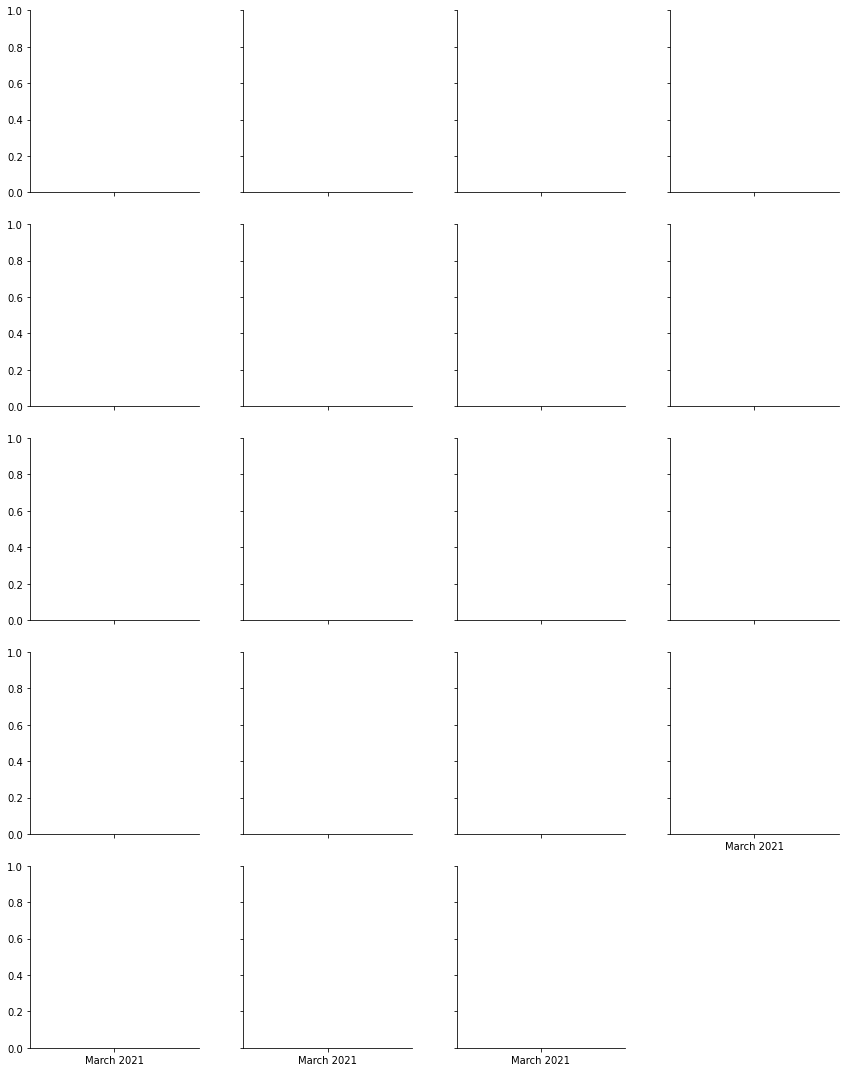

In [25]:
g = sns.FacetGrid(all_hotels, col="Nights_stayed", col_wrap=4)
g.map(sns.histplot,"Date of stay", hue="internet",multiple="stack", stat="frequency",data=all_hotels)
g.add_legend()
# show percentage of 

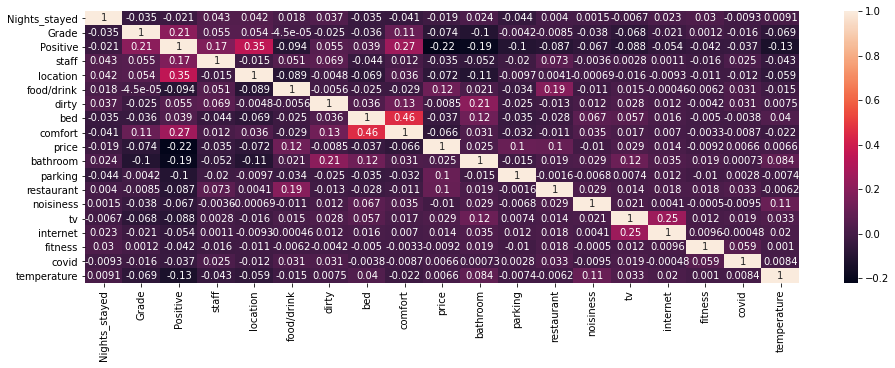

In [36]:
import matplotlib.pyplot as plt
corr = all_hotels.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
df = all_hotels[['Room_info','Date of stay','Guest_country','Facilities']]

sns.pairplot(data=df, kind="scatter")
plt.show()

KeyError: "['Facilities'] not in index"

In [33]:
sns.heatmap(all_hotels)

ValueError: could not convert string to float: 'Kuwait'

In [322]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(all_hotels.Facilities, all_hotels.Travel_type))

(420.4907875642115,
 1.9939231779224118e-62,
 45,
 array([[ 2975.6177041 ,  1354.95081787,   780.77839682,   995.6530812 ],
        [ 4041.71423867,  1840.39905588,  1060.51364036,  1352.3730651 ],
        [ 4490.46876715,  2044.73992754,  1178.26325612,  1502.52804918],
        [  392.72111831,   178.82599627,   103.04689501,   131.40599041],
        [ 4180.5796465 ,  1903.63157317,  1096.95081787,  1398.83796245],
        [ 1150.39027336,   523.83148534,   301.85324953,   384.92499177],
        [ 6583.19482563,  2997.66505654,  1727.37791378,  2202.76220405],
        [  392.23387126,   178.60412779,   102.91904527,   131.24295568],
        [10554.25824276,  4805.89318257,  2769.35334102,  3531.49523365],
        [ 1574.29520255,   716.85706444,   413.08252827,   526.76520474],
        [  788.85296593,   359.20507191,   206.98873824,   263.95322392],
        [ 3002.41629158,  1367.15358437,   787.81013284,  1004.61999122],
        [ 2736.37940498,  1246.01339335,   718.0041717 ,   915

In [319]:
pd.crosstab(all_hotels.Facilities, all_hotels.Travel_type)


Travel_type,Couple,Family,Group,Solo traveler
Facilities,,,,
bathroom,2960,1257,855,1035
bed,4186,1709,1135,1265
comfort,4589,1900,1238,1489
covid,408,205,66,127
dirty,4150,1933,1111,1386
fitness,1165,606,244,346
food/drink,6540,3174,1658,2139
internet,316,171,101,217
location,10498,5048,2668,3447
